In [1]:
library(tidyverse)
setwd("~/Desktop")
chart <- read_csv("chart2019.csv")
options(warn=-1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Parsed with column specification:
cols(
  Hotel = col_character(),
  Brand = col_character(),
  Country = col_character(),
  Points = col_number(),
  Category = col_character()
)


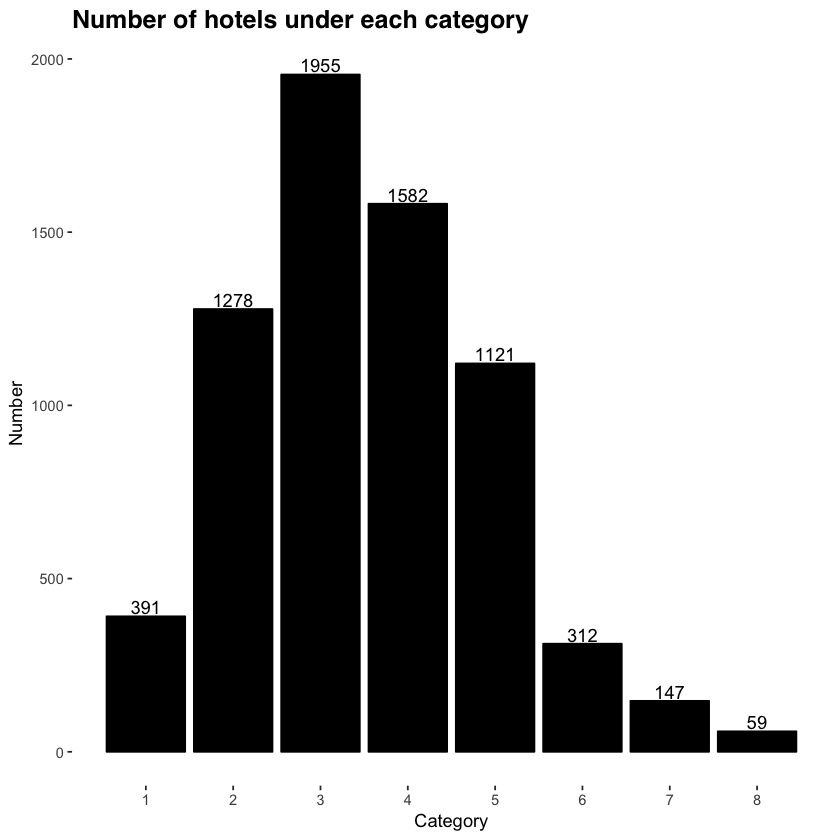

In [2]:
# Draw a bar plot to display the hotel distribution under each categories
graph <- chart %>%
  mutate(Category = as.numeric(str_replace_all(Category, "(\\d)\\*", "\\1"))) %>%
  group_by(Category) %>%
  summarise(Number = n()) %>%
  ggplot() +
  geom_col(aes(y = Number, x = Category), fill = "black", color = "black") +
  geom_text(aes(label = Number, x = Category, y = Number), vjust=-0.2)

mytheme <- theme(plot.title = element_text(family = "Helvetica", face = "bold", size = (15)),
                 panel.background = element_blank())

print(graph + mytheme + labs(title = "Number of hotels under each category", x = "Category", y = "Number") + 
      scale_x_continuous(breaks = seq(1, 8, 1)))

In [3]:
# Count the number of hotels in each brand
chart %>%
  group_by(Brand) %>%
  summarise(n = n())

Brand,n
AC Hotels by Marriott,144
Aloft,160
Autograph Collection,164
Courtyard,1184
Delta,66
Design Hotels,134
Edition,10
Element,41
Fairfield Inn,960
Four Points,274


In [4]:
# Overview of point requirement under new program
chart %>%
  group_by(Points) %>%
  summarise(n = n())

Points,n
7500,391
12500,1278
17500,1955
25000,1582
35000,1121
50000,312
60000,146
85000,60


In [5]:
chart %>%
  group_by(Brand, Category) %>%
  summarise(number = n()) %>%
  spread(key = Category, value = number)

Brand,1,2,3,4,5,6,7,8*
AC Hotels by Marriott,26,23,30,43,22,NA,NA,NA
Aloft,25,17,45,58,15,NA,NA,NA
Autograph Collection,NA,6,8,23,79,40,7,1
Courtyard,69,281,460,256,112,6,NA,NA
Delta,NA,5,19,26,15,1,NA,NA
Design Hotels,NA,3,1,29,61,7,27,6
Edition,NA,NA,NA,NA,4,1,4,1
Element,3,4,15,16,3,NA,NA,NA
Fairfield Inn,96,286,394,135,46,3,NA,NA
Four Points,53,63,83,54,21,NA,NA,NA


In [6]:
# Which premium hotels in US cost 50,000 points per night?
chart %>%
  filter(Points == 50000, Country == "USA", Brand %in% c(
    "Marriott", "W Hotels", "Sheraton", "Westin", "Luxury Collection", "JW Marriott", 
    "Autograph Collection", "Ritz-Carton"))

ERROR while rich displaying an object: Error in gsub(" &\\", "\\", r, fixed = TRUE): input string 1 is invalid in this locale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_latex.data.frame(obj)
9. gsub(" &\\", "\\", r, fixed = TRUE)


Hotel,Brand,Country,Points,Category
Beverly Hills Marriott,Marriott,USA,50000,6
Boston Marriott Cambridge,Marriott,USA,50000,6
Boston Marriott Copley Place,Marriott,USA,50000,6
Boston Marriott Long Wharf,Marriott,USA,50000,6
"Cadillac Hotel & Beach Club, Autograph Collection",Autograph Collection,USA,50000,6
"Casa Monica Resort & Spa, Autograph Collection",Autograph Collection,USA,50000,6
Clearwater Beach Marriott Suites on Sand Key,Marriott,USA,50000,6
Coronado Island Marriott Resort & Spa,Marriott,USA,50000,6
Fort Lauderdale Marriott Harbor Beach Resort & Spa,Marriott,USA,50000,6
"Grand Bohemian Hotel Asheville, Autograph Collection",Autograph Collection,USA,50000,6


In [7]:
# Which hotels in China can be redeemed using certificate from credit card?
chart %>%
  filter(Country == "China", Points %in% c(35000, 50000, 60000), !str_detect(Hotel, "Airport")) %>%
  select(Hotel, Points) %>%
  arrange(Points)

ERROR while rich displaying an object: Error in gsub(" &\\", "\\", r, fixed = TRUE): input string 1 is invalid in this locale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_latex.data.frame(obj)
9. gsub(" &\\", "\\", r, fixed = TRUE)


Hotel,Points
Hong Kong Ocean Park Marriott Hotel,35000
JW Marriott Hotel Macau,35000
JW Marriott Hotel Shanghai at Tomorrow Square,35000
Le M<8e>ridien Xiaojing Bay,35000
"Mira Moon Hong Kong, a Member of Design Hotels",35000
Renaissance Hong Kong Harbour View Hotel,35000
Sanya Marriott Yalong Bay Resort & Spa,35000
"Sheraton Dameisha Resort, Shenzhen",35000
"Sheraton Grand Macao Hotel, Cotai Central",35000
Sheraton Huzhou Hot Spring Resort,35000


In [8]:
# Which hotels in Los Angeles can be redeemed using certificate from credit card?
chart %>%
  filter(str_detect(Hotel, "Los Angeles|Hollywood|Beverly Hills"), !str_detect(Hotel, "Airport"), Points %in% c(35000, 50000, 60000)) %>%
  select(Hotel, Points) %>%
  arrange(Points)

ERROR while rich displaying an object: Error in gsub(" &\\", "\\", r, fixed = TRUE): input string 1 is invalid in this locale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_latex.data.frame(obj)
9. gsub(" &\\", "\\", r, fixed = TRUE)


Hotel,Points
AC Hotel Beverly Hills,35000
"Avalon Hotel Beverly Hills, a Member of Design Hotels",35000
Courtyard Los Angeles Century City/Beverly Hills,35000
Courtyard Los Angeles L.A. LIVE,35000
Courtyard Los Angeles LAX/Century Boulevard,35000
Courtyard Los Angeles LAX/El Segundo,35000
Courtyard Los Angeles Pasadena/Old Town,35000
Courtyard Los Angeles Sherman Oaks,35000
Courtyard Los Angeles Westside,35000
Four Points by Sheraton Los Angeles Westside,35000


In [9]:
# Which hotels in San Francisco can be redeemed using certificate from credit card?
chart %>%
  filter(str_detect(Hotel, "San Francisco"), !str_detect(Hotel, "Airport"), Points %in% c(35000, 50000, 60000)) %>%
  select(Hotel, Points) %>%
  arrange(Points)

ERROR while rich displaying an object: Error in gsub(" &\\", "\\", r, fixed = TRUE): input string 1 is invalid in this locale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_latex.data.frame(obj)
9. gsub(" &\\", "\\", r, fixed = TRUE)


Hotel,Points
Courtyard San Francisco Downtown,35000
Courtyard San Francisco Fisherman's Wharf,35000
Courtyard San Francisco Larkspur Landing/Marin County,35000
Courtyard San Francisco Union Square,35000
JW Marriott San Francisco Union Square,50000
Le M<8e>ridien San Francisco,50000
"Palace Hotel, a Luxury Collection Hotel, San Francisco",50000
San Francisco Marriott Fisherman's Wharf,50000
San Francisco Marriott Marquis,50000
San Francisco Marriott Union Square,50000


In [10]:
# Which hotels in New York can be redeemed using certificate from credit card?
chart %>%
  filter(str_detect(Hotel, "New York"), !str_detect(Hotel, "Airport"), Points %in% c(35000, 50000, 60000)) %>%
  select(Hotel, Points) %>%
  arrange(Points)

ERROR while rich displaying an object: Error in gsub(" &\\", "\\", r, fixed = TRUE): input string 1 is invalid in this locale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_latex.data.frame(obj)
9. gsub(" &\\", "\\", r, fixed = TRUE)


Hotel,Points
AC Hotel New York Times Square,35000
Courtyard New York Manhattan/Central Park,35000
Courtyard New York Manhattan/Chelsea,35000
Courtyard New York Manhattan/Fifth Avenue,35000
Courtyard New York Manhattan/Herald Square,35000
Courtyard New York Manhattan/Midtown East,35000
Courtyard New York Manhattan/SoHo,35000
Courtyard New York Manhattan/Times Square,35000
Courtyard New York Manhattan/Times Square West,35000
Courtyard New York Manhattan/Upper East Side,35000


In [11]:
# Which hotels in DC can be redeemed using certificate from credit card?
chart %>%
  filter(str_detect(Hotel, "Washington"), !str_detect(Hotel, "Airport"), Points %in% c(35000, 50000, 60000)) %>%
  select(Hotel, Points) %>%
  arrange(Points)

Hotel,Points
Courtyard Washington Capitol Hill/Navy Yard,35000
Courtyard Washington Convention Center,35000
Courtyard Washington Downtown/Convention Center,35000
Courtyard Washington Embassy Row,35000
"Courtyard Washington, DC/Dupont Circle",35000
"Courtyard Washington, DC/Foggy Bottom",35000
"Fairfield Inn & Suites Washington, DC/Downtown",35000
"Marriott Marquis Washington, DC",35000
"Renaissance Washington, DC Downtown Hotel",35000
Residence Inn Washington Capitol Hill/Navy Yard,35000


In [12]:
# Which hotels in Seattle can be redeemed using certificate from credit card?
chart %>%
  filter(str_detect(Hotel, "Seattle"), !str_detect(Hotel, "Airport"),
         Points %in% c(35000, 50000, 60000)) %>%
  select(Hotel, Points) %>%
  arrange(Points)

Hotel,Points
Courtyard Seattle Downtown/Lake Union,35000
Courtyard Seattle Downtown/Pioneer Square,35000
Four Points by Sheraton Downtown Seattle Center,35000
Moxy Seattle Downtown,35000
Residence Inn Seattle Downtown/Convention Center,35000
Residence Inn Seattle Downtown/Lake Union,35000
Residence Inn Seattle University District,35000
Sheraton Seattle Hotel,35000
SpringHill Suites Seattle Downtown/South Lake Union,35000
Renaissance Seattle Hotel,50000


In [13]:
# Which hotels in Hwawii can be redeemed using certificate from credit card?
chart %>%
  filter(str_detect(Hotel, "Kauai|Waikiki|Oahu|Honolulu
                    |Maui|Kaiulani|Keauhou|Hapuna|Princeville
                    |Ka'anapali|Kona|Wailokoloa|Mauna|Kailua|Lahania"), !str_detect(Hotel, "Airport"), Points %in% c(35000, 50000, 60000)) %>%
  select(Hotel, Points) %>%
  arrange(Points)

Hotel,Points
Courtyard Oahu North Shore,35000
Courtyard Waikiki Beach,35000
Hapuna Beach Resort,35000
Residence Inn Maui Wailea,35000
Sheraton Kauai Resort,35000
Sheraton Kona Resort & Spa at Keauhou Bay,35000
Sheraton Princess Kaiulani,35000
Marriott's Maui Ocean Club - Lahaina & Napili Towers,50000
"Marriott's Maui Ocean Club - Molokai, Maui & Lanai Towers",50000
"Mauna Kea Beach Hotel, Autograph Collection",50000


In [14]:
# Which hotels in Texas can be redeemed using certificate from credit card?
chart %>%
  filter(str_detect(Hotel, "Dallas|Houston|San Antonio|Austin"), !str_detect(Hotel, "Airport"),
        Points %in% c(35000, 50000, 60000)) %>%
  select(Hotel, Points) %>%
  arrange(Points)

ERROR while rich displaying an object: Error in gsub(" &\\", "\\", r, fixed = TRUE): input string 1 is invalid in this locale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_latex.data.frame(obj)
9. gsub(" &\\", "\\", r, fixed = TRUE)


Hotel,Points
Austin Marriott South,35000
Houston Marriott Medical Center/Museum District,35000
JW Marriott Houston Downtown,35000
"Le M<8e>ridien Dallas, The Stoneleigh",35000
Le M<8e>ridien Houston Downtown,35000
Marriott Marquis Houston,35000
Renaissance Austin Hotel,35000
San Antonio Marriott Rivercenter,35000
San Antonio Marriott Riverwalk,35000
Sheraton Austin Hotel at the Capitol,35000


In [15]:
# Which hotels in Paris can be redeemed using certificate from credit card?
chart %>%
  filter(str_detect(Hotel, "Paris"), !str_detect(Hotel, "Airport"), Points %in% c(35000, 50000, 60000)) %>%
  select(Hotel, Points) %>%
  arrange(Points)

ERROR while rich displaying an object: Error in gsub(" &\\", "\\", r, fixed = TRUE): input string 1 is invalid in this locale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_latex.data.frame(obj)
9. gsub(" &\\", "\\", r, fixed = TRUE)


Hotel,Points
"Le Dokhan's, a Tribute Portfolio Hotel, Paris",35000
Paris Marriott Rive Gauche Hotel & Conference Center,35000
Renaissance Paris Republique Hotel,35000
"Le Metropolitan, a Tribute Portfolio Hotel, Paris",50000
Paris Marriott Opera Ambassador Hotel,50000
Renaissance Paris Arc de Triomphe Hotel,50000
Renaissance Paris Le Parc Trocadero Hotel,50000
Renaissance Paris Vendome Hotel,50000
"Hotel de NELL, Paris, a Member of Design Hotels",60000
"La Maison Champs Elys<8e>es, Paris, a Member of Design Hotels",60000


In [16]:
# Which hotels in London can be redeemed using certificate from credit card?
chart %>%
  filter(str_detect(Hotel, "London"), !str_detect(Hotel, "Airport"), Points %in% c(35000, 50000, 60000)) %>%
  select(Hotel, Points) %>%
  arrange(Points)

ERROR while rich displaying an object: Error in gsub(" &\\", "\\", r, fixed = TRUE): input string 1 is invalid in this locale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_latex.data.frame(obj)
9. gsub(" &\\", "\\", r, fixed = TRUE)


Hotel,Points
London Heathrow Marriott Hotel,35000
London Marriott Hotel Kensington,35000
London Marriott Hotel Maida Vale,35000
London Marriott Hotel Regents Park,35000
London Marriott Hotel West India Quay,35000
Residence Inn by Marriott London Bridge,35000
Residence Inn London Kensington,35000
Sheraton Skyline Hotel London Heathrow,35000
"Town Hall Hotel & Apartments, London, a Member of Design Hotels",35000
"Great Northern Hotel, a Tribute Portfolio Hotel, London",50000


In [17]:
# Which hotels in Italy can be redeemed using certificate from credit card?
chart %>%
  filter(str_detect(Hotel, "Milan|Roma|Venezia|Firenze|Siena"), !str_detect(Hotel, "Airport"),
         Points %in% c(35000, 50000, 60000)) %>%
  select(Hotel, Points) %>%
  arrange(Points)

ERROR while rich displaying an object: Error in gsub(" &\\", "\\", r, fixed = TRUE): input string 1 is invalid in this locale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_latex.data.frame(obj)
9. gsub(" &\\", "\\", r, fixed = TRUE)


Hotel,Points
AC Hotel Firenze,35000
AC Hotel Venezia,35000
"Sheraton Diana Majestic, Milan",35000
"STRAF, Milan, a Member of Design Hotels",35000
"The Siena Hotel, Autograph Collection",35000
"The Westin Palace, Milan",35000
"Excelsior Hotel Gallia, a Luxury Collection Hotel, Milan",60000
"Hotel Viu Milan, a Member of Design Hotels",60000
"The Romanos, a Luxury Collection Resort, Costa Navarino",60000


In [18]:
# Which hotels in Japan can be redeemed using certificate from credit card?
chart %>%
  filter(Country == "Japan", Points %in% c(35000, 50000, 60000)) %>%
  select(Hotel, Points) %>%
  arrange(Points)

Hotel,Points
Courtyard Shin-Osaka Station,35000
Courtyard Tokyo Ginza Hotel,35000
Courtyard Tokyo Station,35000
Fuji Marriott Hotel Lake Yamanaka,35000
Izu Marriott Hotel Shuzenji,35000
Karuizawa Marriott Hotel,35000
Kobe Bay Sheraton Hotel & Towers,35000
Lake Biwa Marriott Hotel,35000
Moxy Osaka Honmachi,35000
Moxy Tokyo Kinshicho,35000


In [19]:
# Which hotels in US and China have the best redemption value?
(cat1 <- chart %>%
  filter(Category == 1, Country %in% c("China", "USA")) %>%
  select(Country, Hotel))

Country,Hotel
China,Aloft Chengdu Shixiang Lake
USA,Aloft Cleveland Airport
China,Aloft Dalian
China,Aloft Dongguan Dynamic Town
China,Aloft Dongguan Songshan Lake
China,Aloft Guangzhou Tianhe
China,Aloft Guangzhou University Park
China,Aloft Haiyang
China,"Aloft Nanhai, Foshan"
USA,Aloft Tulsa
